# NovaPCA Class Tutorial

### This notebook is an introduction to the NovaPCA class. This class loads the SNID Supernovae (SNe) spectra and runs PCA analysis. The following tutorial covers all the important functionality. If you do not have pidly or the IcBL smoothing IDL code, then skip to the Save/Load section to load a pickled NovaPCA object.

## Initialization and loading SNID

In [24]:
import NovaPCA
import numpy as np

In [25]:
snid_dir_path = 'allSNIDtemp/'
SNePCA = NovaPCA.NovaPCA(snid_dir_path)

In [26]:
# See the documentation for explanations of these arguments and for the SNID types structure.

loadTypes = [(2,1), (2,2), (2,3), (2,4), (2,5), (3,1), (3,2), (3,3), (3,4)]
phaseType = 0
loadPhase = 15
phRange = 5
minwvl = 4000
maxwvl = 7000
SNePCA.loadSNID(loadTypes, phaseType, loadPhase, phRange, minwvl, maxwvl)

151


In [27]:
SNePCA.spectraMatrix.shape

(57, 414)

In [28]:
print SNePCA.spectraMatrix
print "There are %d spectra satisfying the constraints of loadSNID, \
each with %d wavelength bins"%(SNePCA.spectraMatrix.shape)

[[ 0.051  0.091  0.077 ..., -0.003 -0.046 -0.043]
 [ 0.417  0.515  0.607 ..., -0.129 -0.135 -0.115]
 [ 0.     0.     0.    ..., -0.2   -0.133 -0.162]
 ..., 
 [ 0.414  0.416  0.418 ...,  0.21   0.204  0.189]
 [-0.287  0.076 -0.171 ..., -0.117 -0.087 -0.124]
 [ 0.441  0.432  0.431 ...,  0.     0.     0.   ]]
There are 57 spectra satisfying the constraints of loadSNID, each with 414 wavelength bins


In [29]:
# The user specifies that each SNe should have the spectrum 
# loaded that is closest to loadPhase = 15 days. The obsSNIDPhases
# property keeps track of which phase is chosen for each SNe.
SNePCA.obsSNIDPhases

array([ 15.4 ,  15.  ,  15.96,  10.4 ,  14.2 ,  15.7 ,  13.  ,  13.  ,
        11.3 ,  15.4 ,  14.  ,  14.3 ,  13.6 ,  12.  ,  15.8 ,  12.9 ,
        14.1 ,  15.5 ,  13.4 ,  10.6 ,  13.8 ,  11.06,  15.8 ,  16.5 ,
        12.2 ,  15.7 ,  17.3 ,  12.6 ,  12.2 ,  15.  ,  16.8 ,  12.2 ,
        15.4 ,  15.2 ,  17.1 ,  15.4 ,  12.7 ,  12.8 ,  14.6 ,  18.5 ,
        16.8 ,  15.5 ,  17.  ,  11.9 ,  16.4 ,  18.3 ,  12.9 ,  16.4 ,
        15.5 ,  13.8 ,  15.  ,  15.7 ,  11.6 ,  18.  ,  14.2 ,  18.8 ,
        11.9 ])

In [30]:
# SNe names are stored in the sneNames field
SNePCA.sneNames

array(['sn2009er', 'sn2007gr', 'sn2007ru', 'sn2010ma', 'sn2004dk',
       'sn2010ay', 'sn1999dn', 'sn2011ei', 'sn1990I', 'sn2011dh',
       'sn2012ap', 'sn2006T', 'sn1998dt', 'sn1983N', 'sn2005hg',
       'sn2009iz', 'sn2003dh', 'sn2003bg', 'sn2013dx', 'sn2006aj',
       'sn2007C', 'sn1994I', 'sn2004gq', 'sn1993J', 'sn2004ge', 'sn1997ef',
       'sn2005az', 'sn2007uy', 'sn2004aw', 'sn2004gv', 'sn1998bw',
       'sn04aw_bsnip', 'sn1990B', 'sn2005la', 'PTF10qts', 'sn2010bh',
       'sn2002ap', 'sn2007Y', 'sn2009bb', 'sn2007bg', 'sn2000H',
       'sn2006jc', 'sn2011fu', 'sn1990U', 'sn2004gt', 'sn1998fa',
       'sn1984L', 'sn2011bm', 'sn2006el', 'sn2009mg', 'sn2008ax',
       'sn2008bo', 'sn2006ep', 'sn2009jf', 'sn2008D', 'sn2003jd', 'sn1983V'], 
      dtype='|S12')

In [31]:
# SNID determined SNe Types are stored in the sneTypes field.
SNePCA.sneTypes[0]

array([2, 3])

In [32]:
# The wavelength bins are stored in the wavelengths field.
SNePCA.wavelengths;

In [33]:
# remove mean from each spectrum and scale to std = 1
SNePCA.preprocess()

## IcBL Smoothing

In [34]:
# Smooth the IcBL spectra and return a plot comparing smoothed spectra vs original spectra.
f = SNePCA.smoothIcBL();

% Compiled module: TYPE.
% Compiled module: DEFAULT.
% Compiled module: LMFIT.
% Compiled module: LINEAR_FIT.
% Compiled module: POWERLAW.
% Compiled module: POWERLAW_FIT.
% Compiled module: INTEG.
% Compiled module: BINSPEC.
% Compiled module: SNSPECFFTSMOOTH.
sn2007ru
% Compiled module: READCOL.
% READCOL: Format keyword not supplied - All columns assumed floating point
% Compiled module: GETTOK.
% Compiled module: STRSPLIT.
% Compiled module: STRNUMBER.
% READCOL: 1024 valid lines read
% Compiled module: MOMENT.
% Compiled module: UNIQ.
% Compiled module: INTERPOL.
% Compiled module: FINDEX.
% Compiled module: MEAN.
% Compiled module: LINEAR.
% Compiled module: STDDEV.
sn2010ma
% READCOL: Format keyword not supplied - All columns assumed floating point
% READCOL: 1024 valid lines read
% Program caused arithmetic error: Floating illegal operand
% Detected at LMFIT             321 /home/data/mew488/src/idl/astro_mew488/pro1
  /lmfit.pro
% Program caused arithmetic error: Floating ille

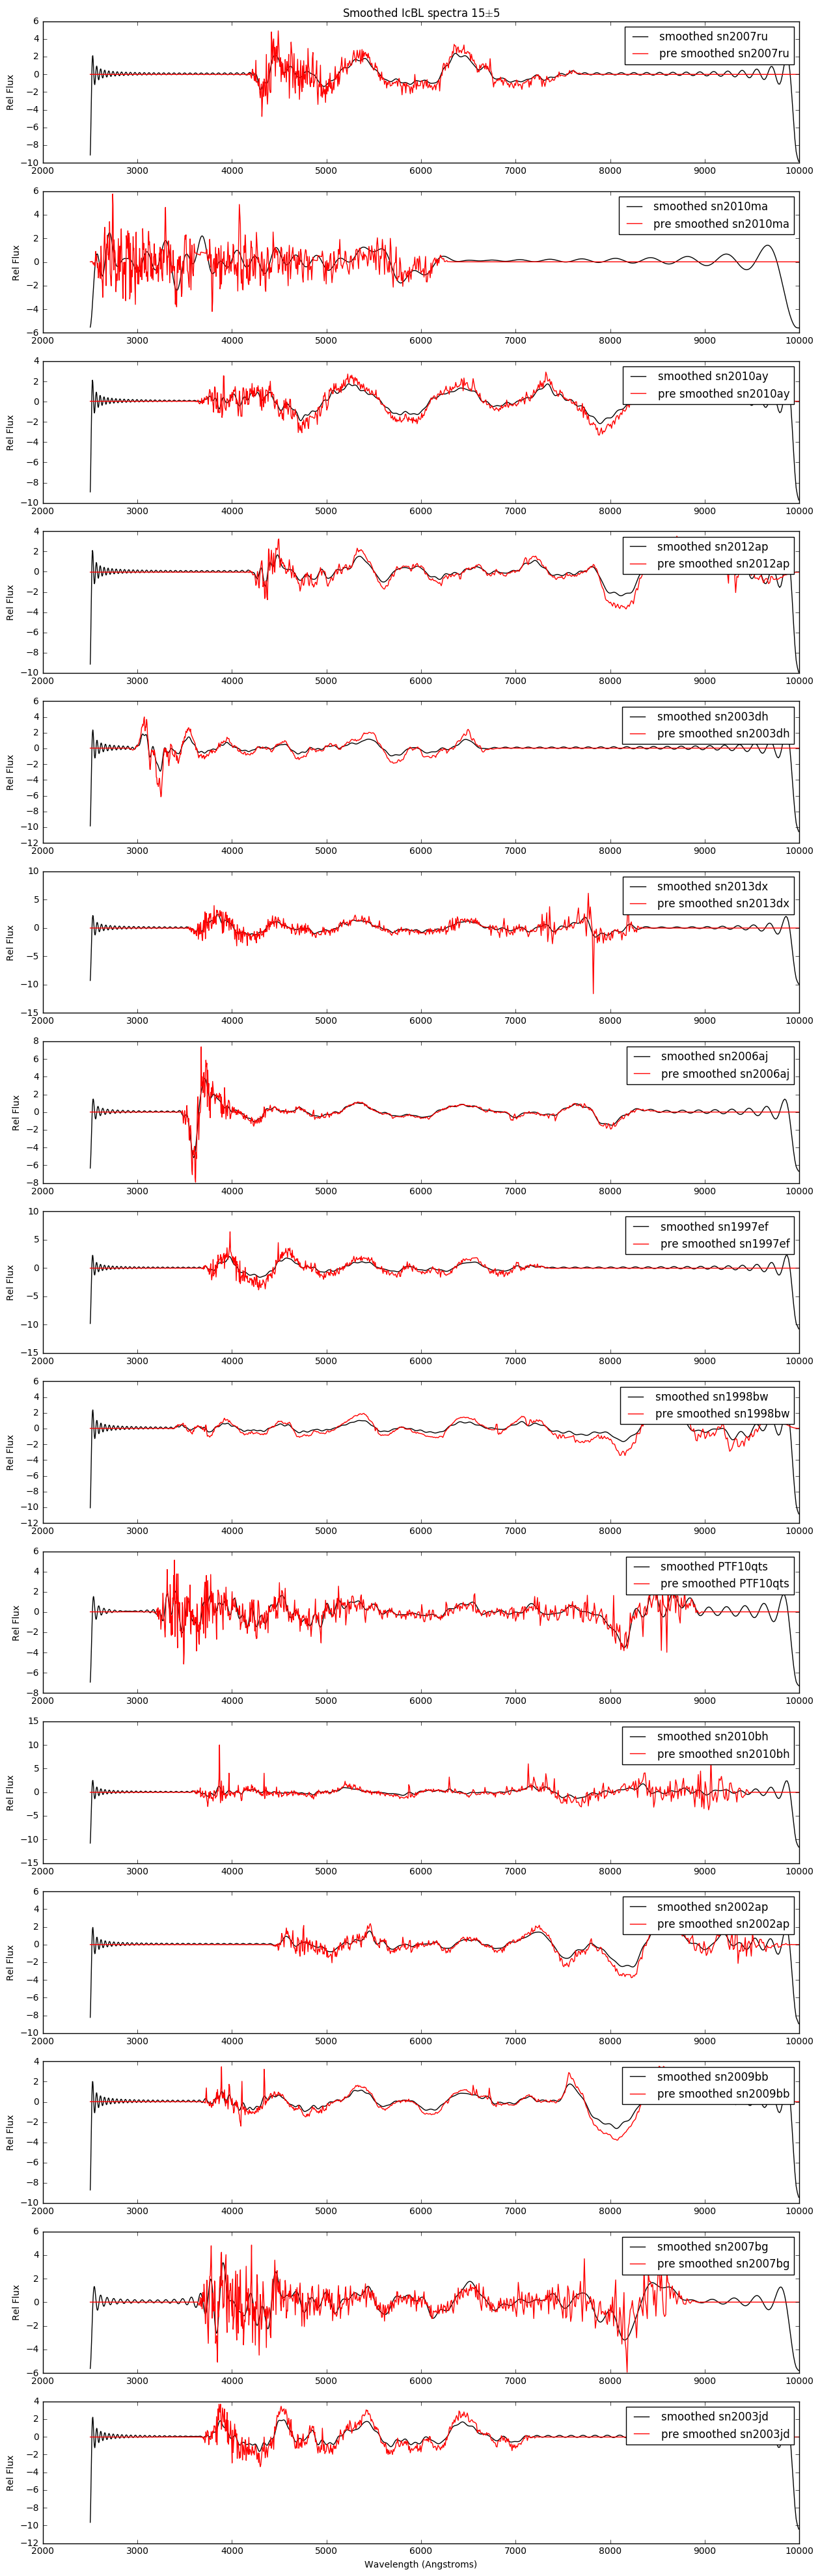

In [35]:
f

## Preprocessing and Plotting spectra

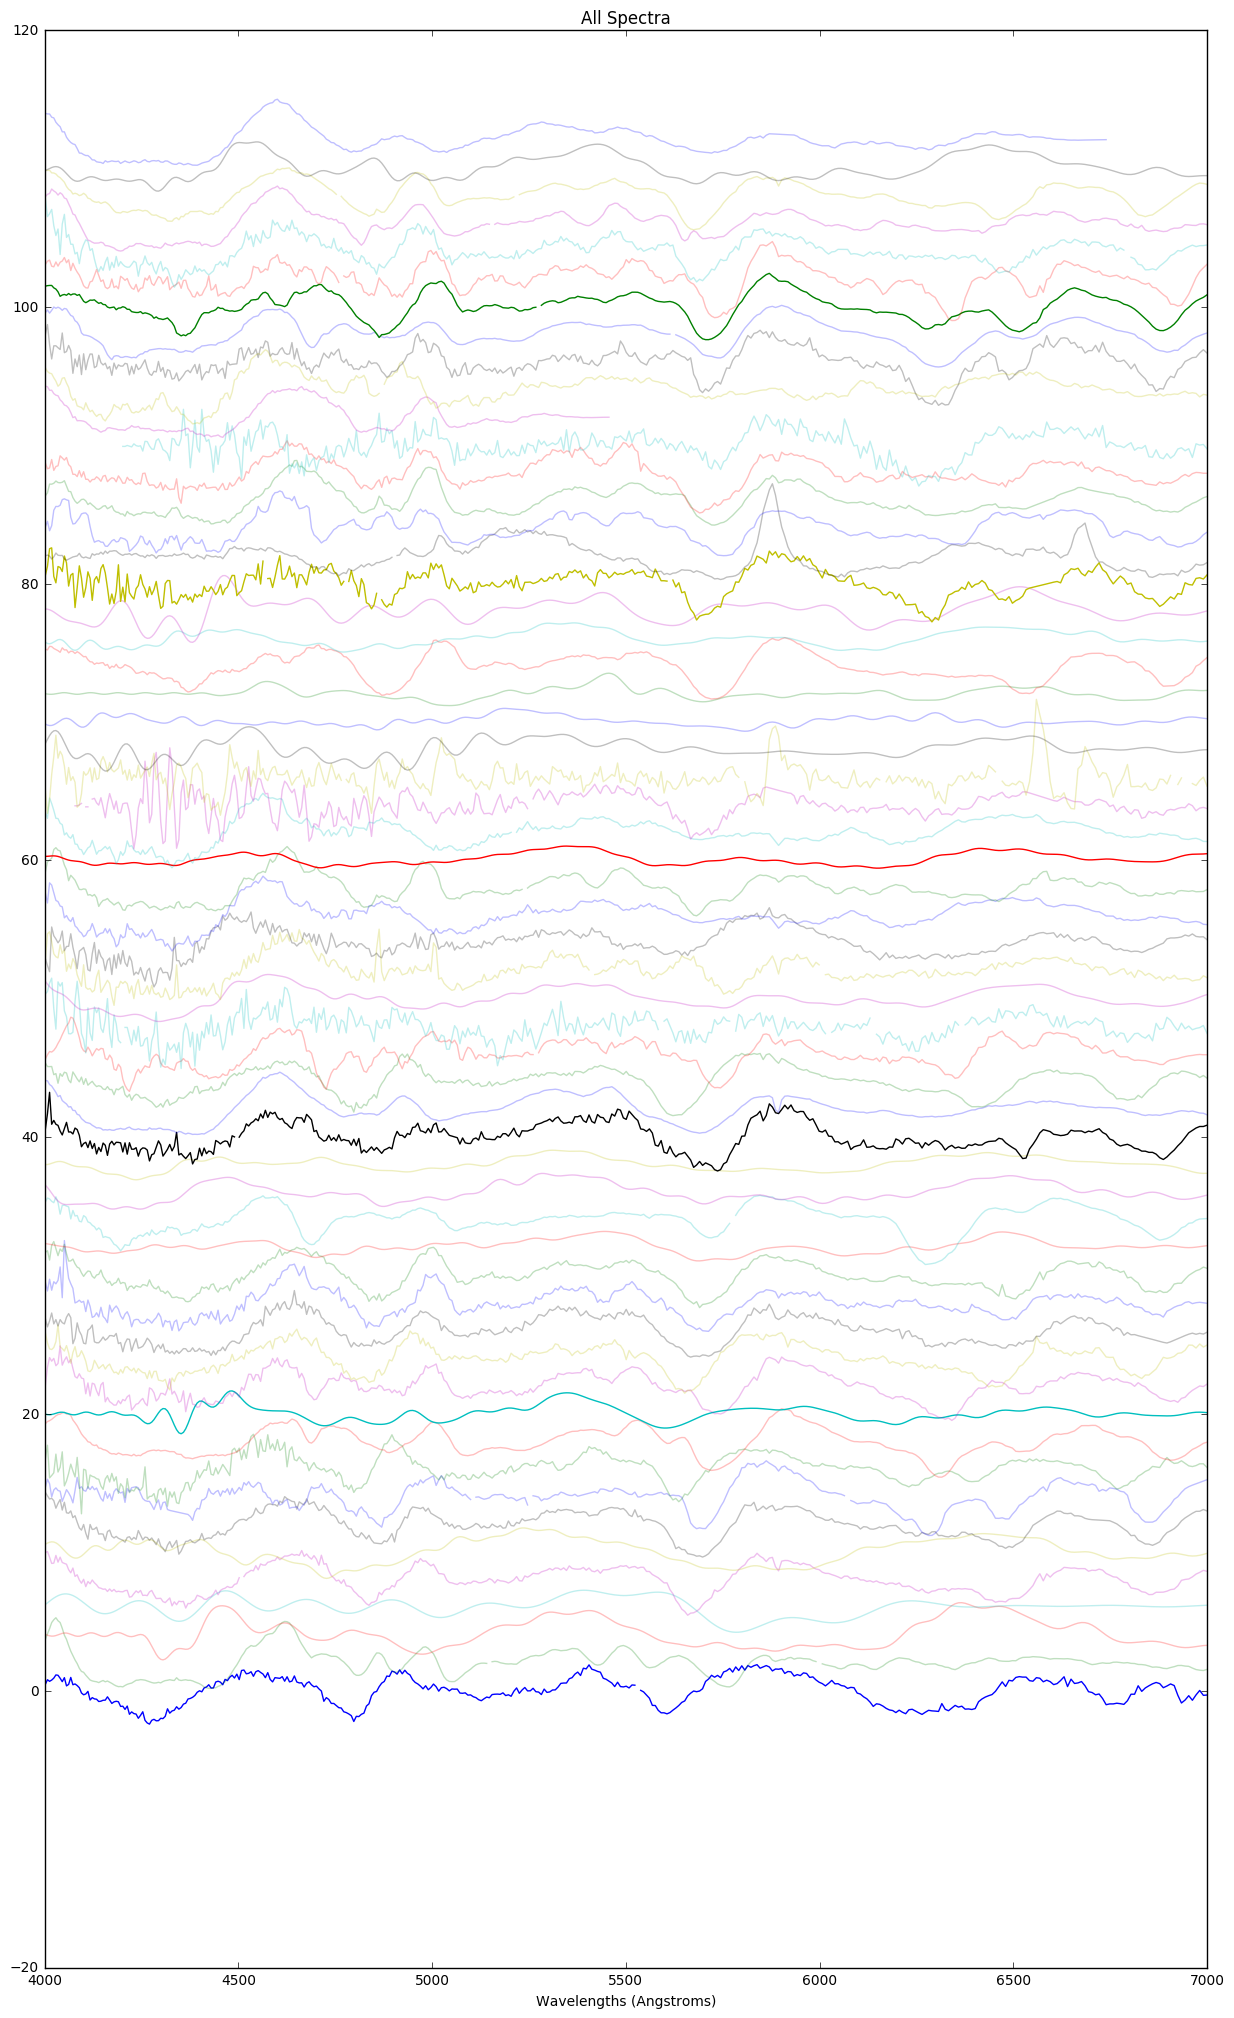

In [36]:
# plot the spectra.
SNePCA.plotSpectra(figsize=(15,25), alpha=0.25)

## Rebinning and Applying Masks

In [37]:
# Rebin the spectra to reduce resolution.
SNePCA.wavelengthRebin(smoothing=2)

In [38]:
# You may find yourself wanting to look at only subsets of the data
# contained in a NovaPCA object. For example, perhaps you want to 
# mask everything out except type Ib SNe. This method takes a user
# specified mask and applies it to all maskable attributes of the NovaPCA
# instance. The user has the option of making a deepcopy of the pre-mask
# NovaPCA object for later use.
gapMask = np.invert(np.array([np.isnan(spec).any() for spec in SNePCA.spectraMatrix]))
print 'total number of bad spectra = %d'%(np.sum(np.invert(gapMask)))

preMaskSNePCA = SNePCA.applyMask(gapMask, savecopy=True)

total number of bad spectra = 4


In [39]:
preMaskSNePCA.spectraMatrix.shape

(57, 207)

In [40]:
SNePCA.spectraMatrix.shape

(53, 207)

## Save/Load NovaPCA

In [41]:
# For quick use, there are save and load methods using pickle. This is 
# particularly useful for new users without pidly or the smoothing IDL code.
# you can run the tutorial by skipping the above steps and loading a saved pickle.
SNePCA.save('NovaPCA_Phase15pm5.sav')
loadedSNePCA = NovaPCA.NovaPCA('path doesnt matter because you will load a saved instance')
loadedSNePCA = loadedSNePCA.load('NovaPCA_Phase15pm5.sav')
SNePCA = loadedSNePCA

## PCA

In [42]:
#reload(NovaPCA)

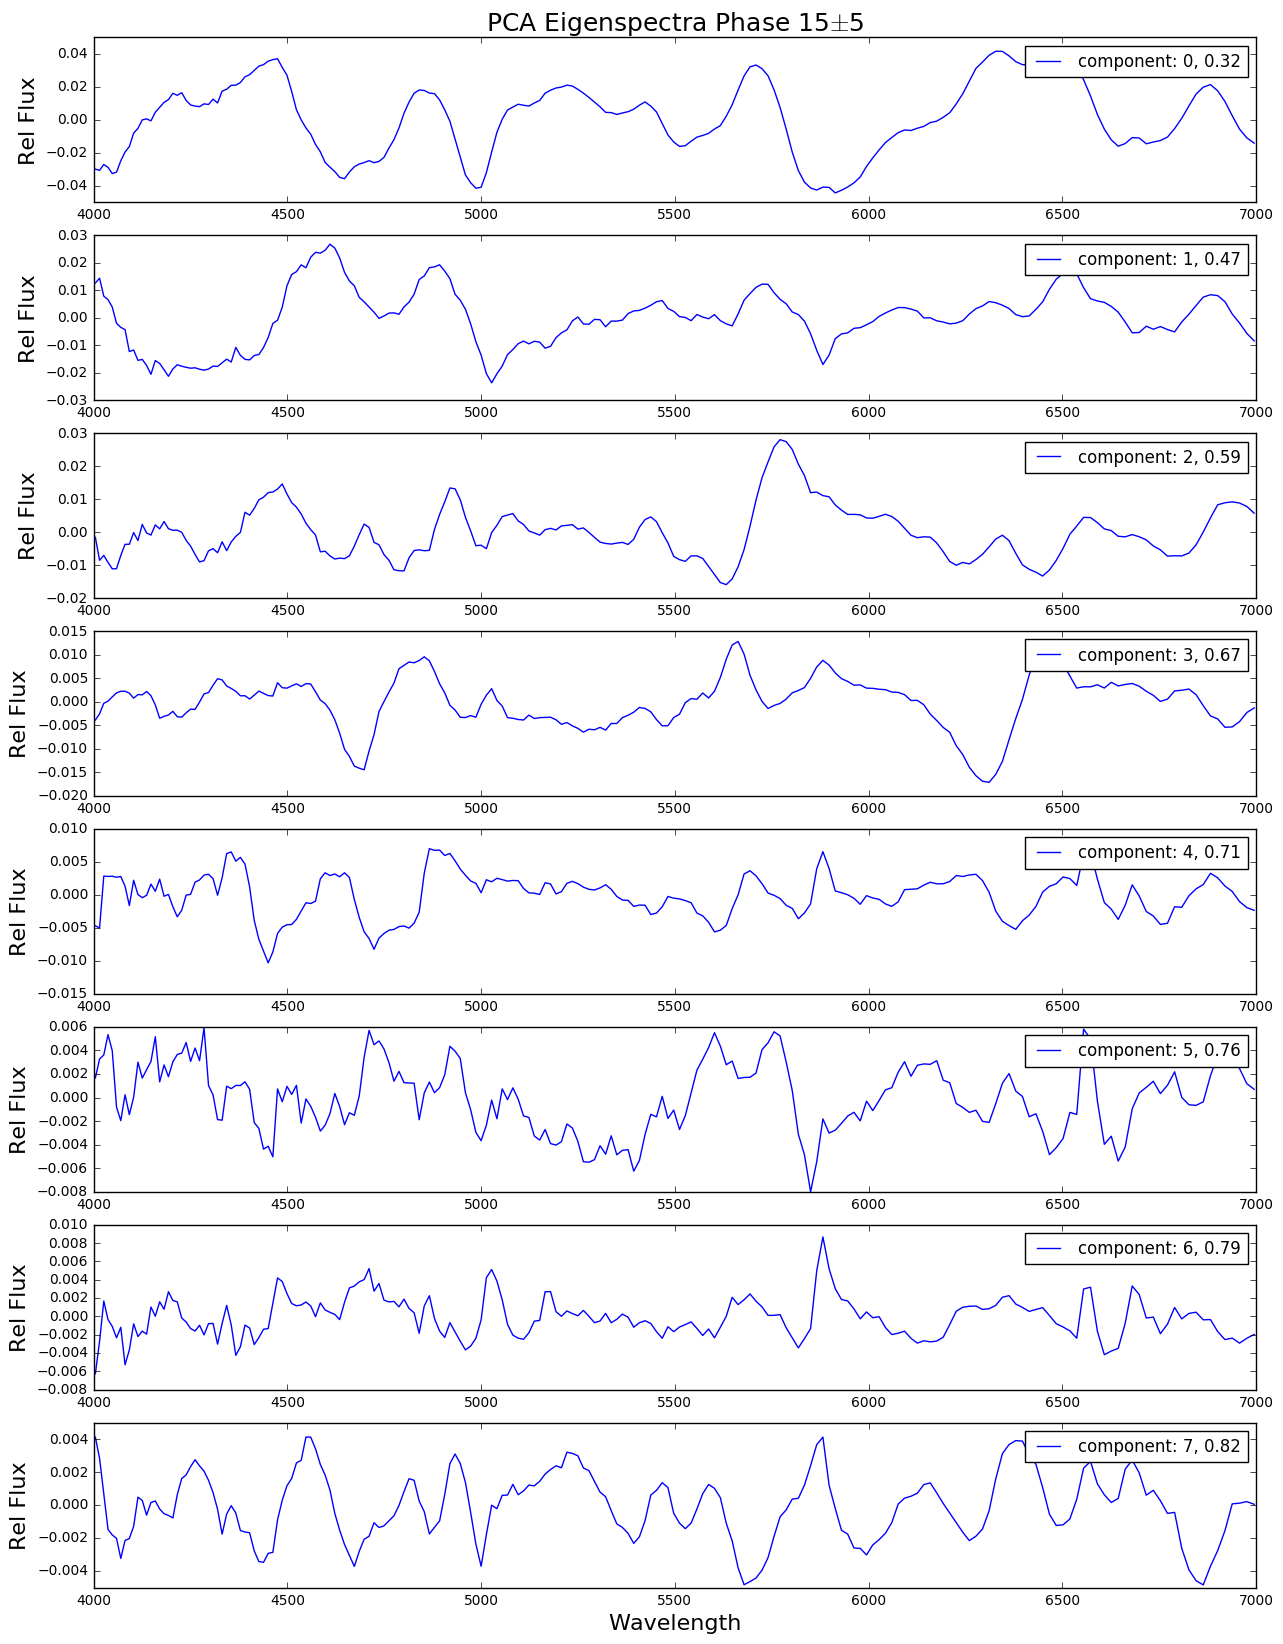

In [43]:
SNePCA.calculatePCA()
SNePCA.plotEigenspectra(figsize=(15,20), nshow=8)

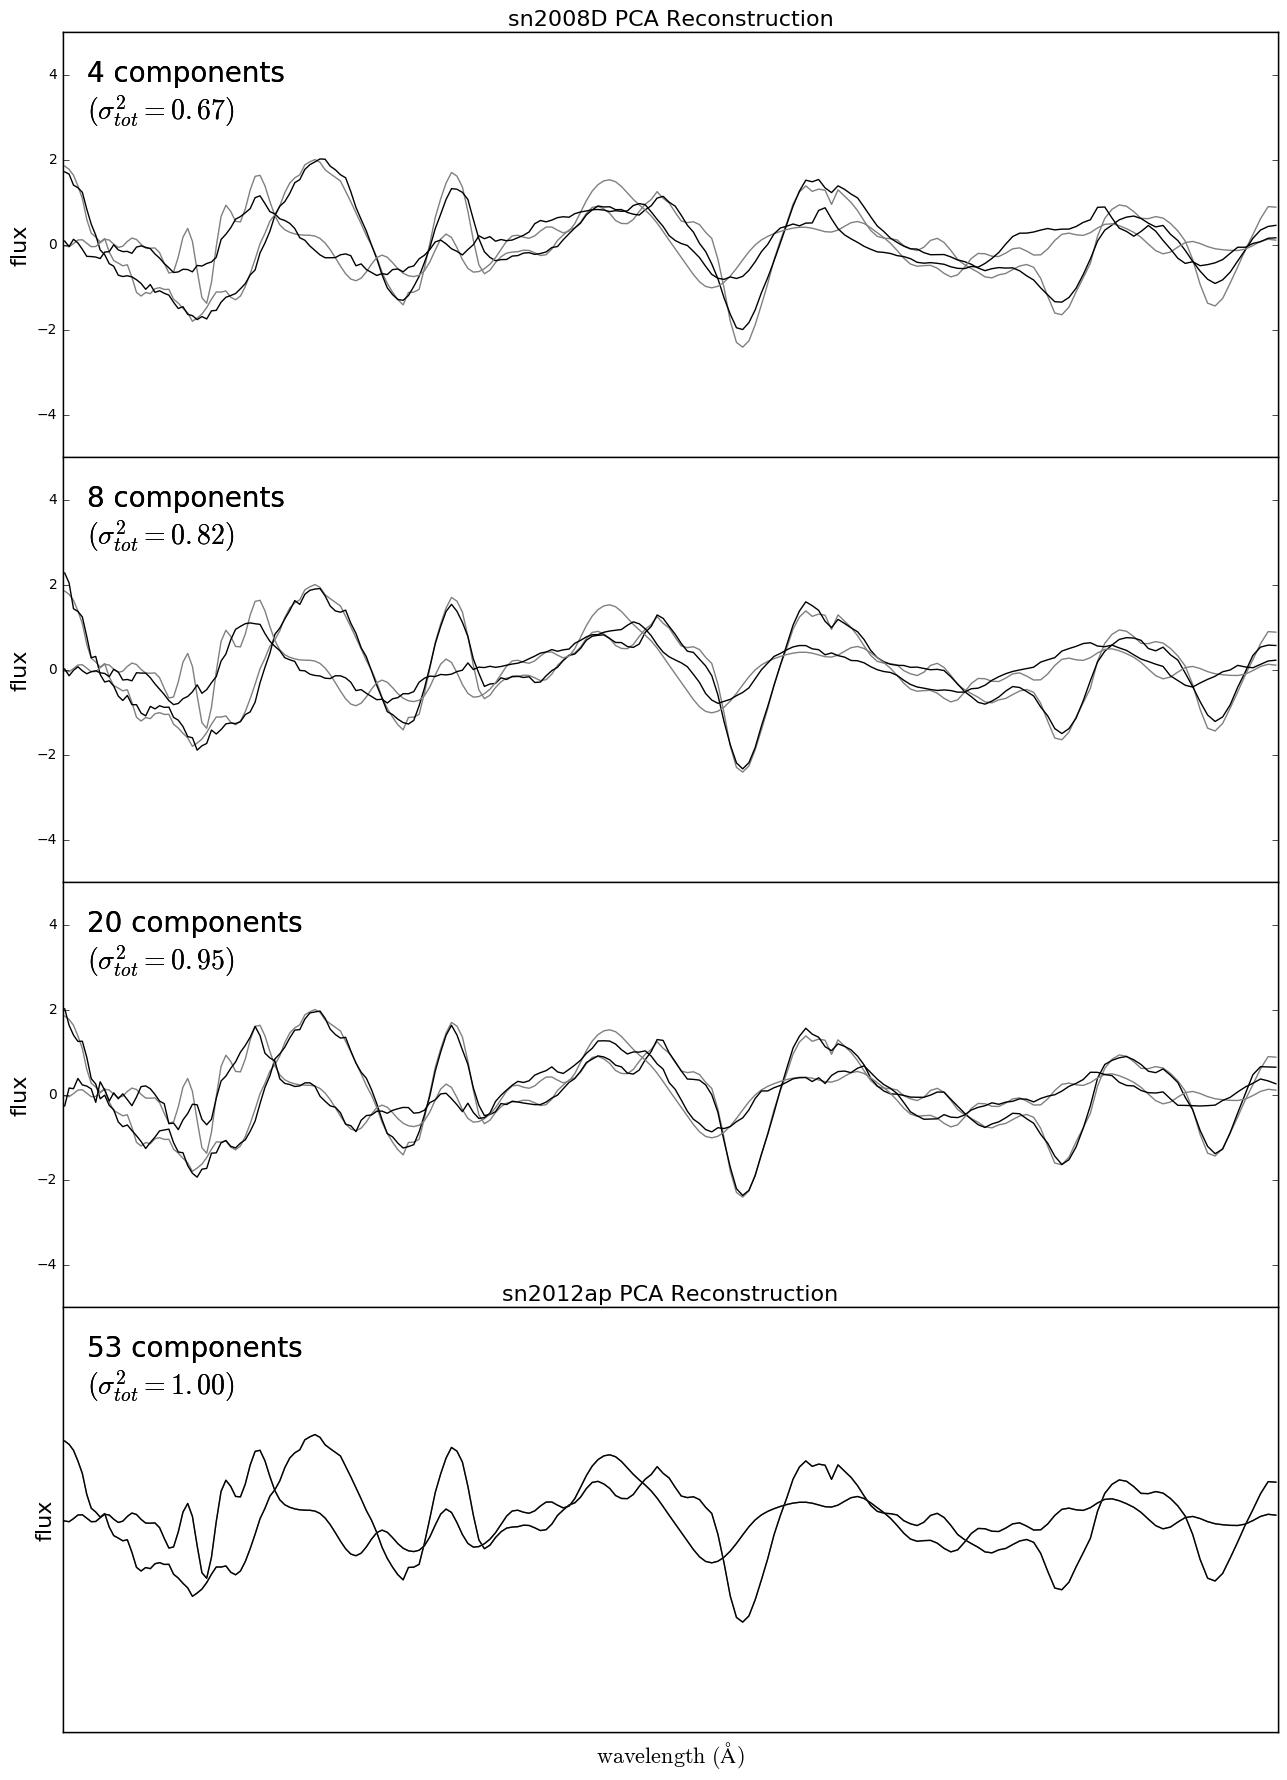

In [44]:
SNePCA.reconstructSpectra(nrecon=1, nPCAComponents=[4,8,20,len(SNePCA.evecs)])

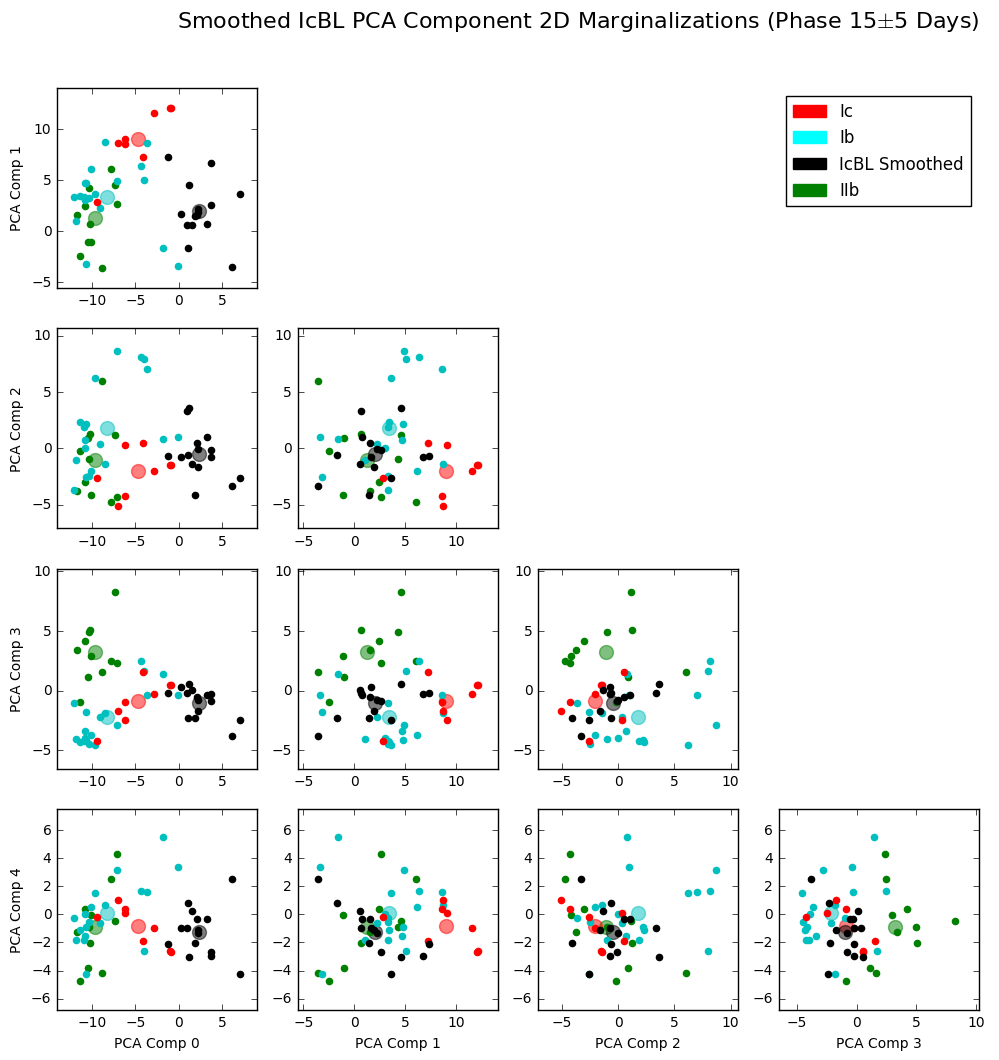

In [45]:
SNePCA.cornerplotPCA(ncomp=5, figsize=(15,15))

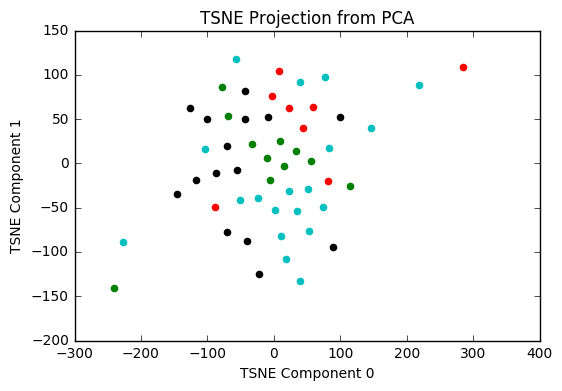

In [46]:
SNePCA.plotTSNE(nPCAComponents=5)